# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Language Detection using NLP and ML</b></p>

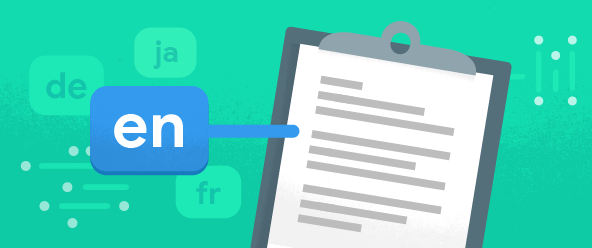

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>About Dataset</b></p>

- In this project, a model that predicts the language of an input text is created.

- The dataset contains texts from 17 different languages.

Dataset: https://www.kaggle.com/datasets/basilb2s/language-detection

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Importing Basic Libraries and the Dataset</b></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("Language_Detection.csv")
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Understanding the Dataset</b></p>

In [3]:
df.shape

(10337, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [5]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [6]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [7]:
len(df[df.duplicated()])

66

There are 66 duplicate rows, let's drop them...

In [8]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [9]:
df.shape

(10271, 2)

The dataset contains texts from 17 different languages:

In [10]:
df["Language"].nunique()

17

How many rows belong to each language?:

In [11]:
df["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

visually...:

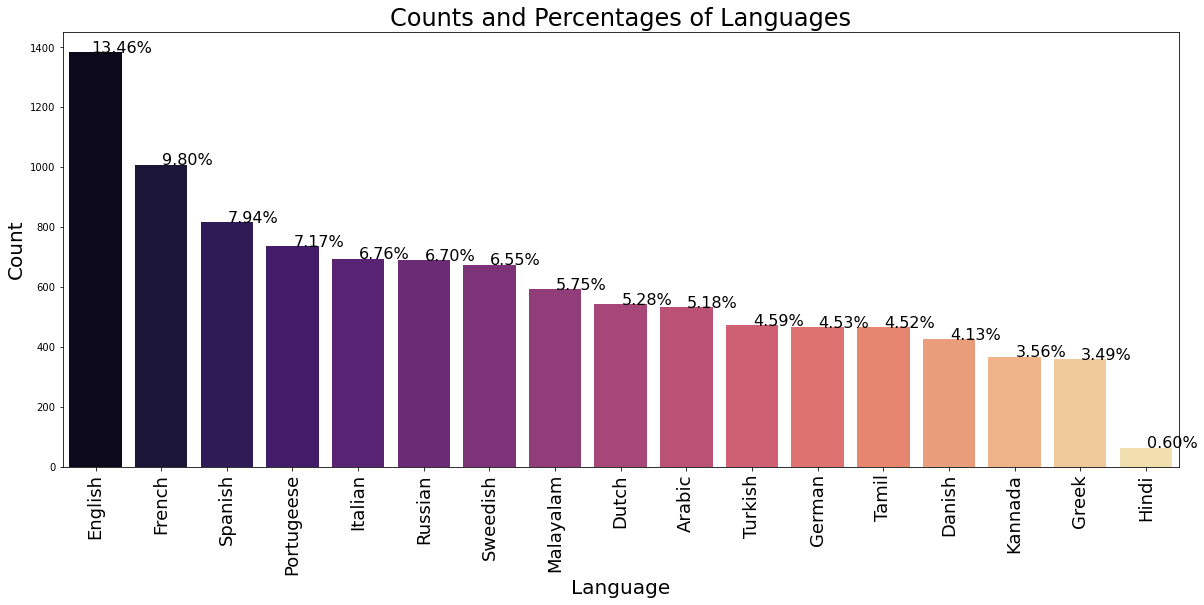

In [12]:
plt.figure(figsize=(20,8))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha='center')
    
plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90) 
plt.show()

In [13]:
language= df['Language'].value_counts().reset_index()
language

,index,Language
0,English,1382
1,French,1007
2,Spanish,816
3,Portugeese,736
4,Italian,694
5,Russian,688
6,Sweedish,673
7,Malayalam,591
8,Dutch,542
9,Arabic,532


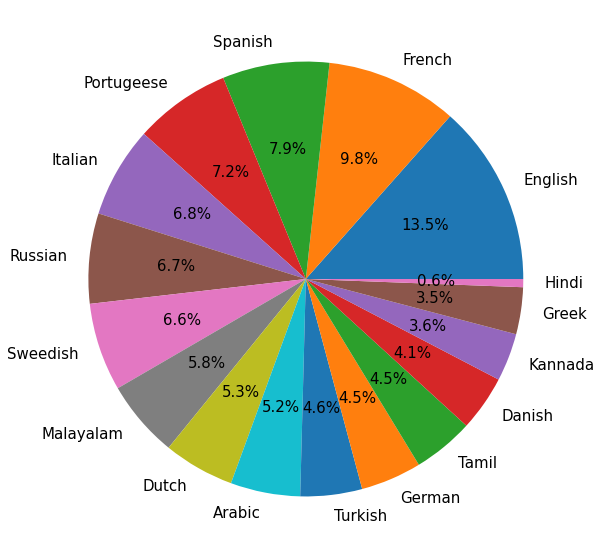

In [16]:
plt.figure(figsize=(10,10))

#create pie chart
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})

plt.show()

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Text Preprocessing</b></p>

Let's create a new column for cleaned text:

In [17]:
df1= df.copy()
df1['cleaned_Text']= ""
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [20]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

and let's clean:

In [21]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Separating Independent and Dependent Features</b></p>

Text data is the independent variable and the language name is the dependent variable.

In [ ]:
X= df1["cleaned_Text"]
y= df1["Language"]

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Label Encoding</b></p>

Language names make up our output variable, which is a categorical variable. We are conducting label encoding on that output variable because we should need to turn it into a numerical form for training the model. We are importing LabelEncoder from sklearn for this procedure.

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

y= encoder.fit_transform(y)

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Bag of Words</b></p>

As is common knowledge, both the input and the output features must be in numerical form. Therefore, using CountVectorizer to build a Bag of Words model, we are converting text into numerical form.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
CV= CountVectorizer()
X= CV.fit_transform(X).toarray()
X.shape

(10271, 39370)

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Splitting Train and Test Data</b></p>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Building Model and Training</b></p>

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MNB' : MultinomialNB()    
}

In [29]:
%%time
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...
Random Forest trained
MNB training started...
MNB trained
CPU times: total: 6min 53s
Wall time: 7min 41s


# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Model Evaluation</b></p>

In [30]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [31]:
%%time
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.524
Random Forest accuracy score :  0.927
MNB accuracy score :  0.981
CPU times: total: 2min 58s
Wall time: 2min 44s


The accuracy of the MNB model is 0.98 which is very good and our model is performing well. 

In [32]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.58      0.35      0.44       146
           1       0.76      0.55      0.64       103
           2       0.87      0.46      0.60       133
           3       0.97      0.59      0.74       361
           4       0.89      0.56      0.69       255
           5       0.84      0.46      0.59       114
           6       1.00      0.48      0.65        79
           7       1.00      0.33      0.50        12
           8       0.97      0.45      0.61       159
           9       0.08      0.97      0.16        86
          10       0.81      0.72      0.76       161
          11       0.90      0.48      0.63       178
          12       0.79      0.29      0.43       150
          13       0.79      0.55      0.65       205
          14       0.99      0.49      0.66       182
          15       0.41      0.86      0.55       111
       

K-Nearest Neighbors ConfusionMatrix


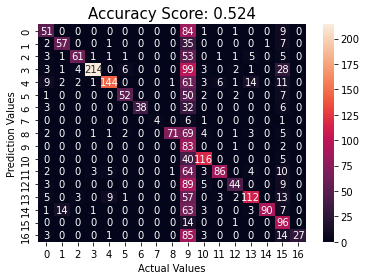

******************************
 
Random Forest ConfusionMatrix


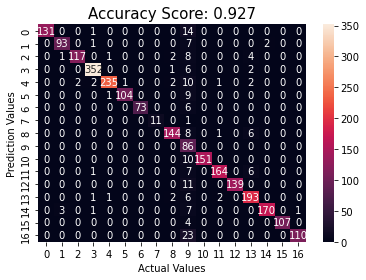

******************************
 
MNB ConfusionMatrix


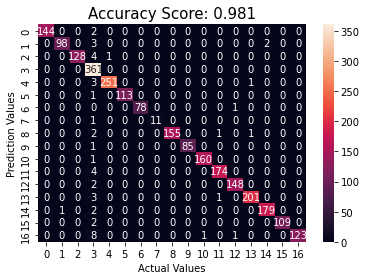

******************************
 


In [33]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("******************************")
    print(" ")

# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Predictions</b></p>

In [39]:
def prediction(text):
    x= CV.transform([text]).toarray()
    lang= model.predict(x)
    lang= encoder.inverse_transform(lang)
    print("This word/sentence contains {} word(s).".format(lang[0]))

In [45]:
prediction("Your memory improves as you learn a language. In addition, since your brain will automatically translate, it enables the brain to work in a versatile way and contributes to the development of your abilities.")

This word/sentence contains English word(s).


In [40]:
prediction("L'apprentissage d'une langue améliore la mémoire. De plus, comme votre cerveau traduira automatiquement, cela lui permet de travailler de manière polyvalente et contribue au développement de vos compétences.")

This word/sentence contains French word(s).


In [41]:
prediction("Η μνήμη σας βελτιώνεται καθώς μαθαίνετε μια γλώσσα. Επιπλέον, δεδομένου ότι ο εγκέφαλός σας θα μεταφραστεί αυτόματα, δίνει τη δυνατότητα στον εγκέφαλο να λειτουργεί με ευέλικτο τρόπο και συμβάλλει στην ανάπτυξη των ικανοτήτων σας.")

This word/sentence contains Greek word(s).


In [43]:
prediction("ನೀವು ಭಾಷೆಯನ್ನು ಕಲಿತಂತೆ ನಿಮ್ಮ ಸ್ಮರಣೆಯು ಸುಧಾರಿಸುತ್ತದೆ. ಹೆಚ್ಚುವರಿಯಾಗಿ, ನಿಮ್ಮ ಮೆದುಳು ಸ್ವಯಂಚಾಲಿತವಾಗಿ ಅನುವಾದಿಸುವುದರಿಂದ, ಇದು ಮೆದುಳಿಗೆ ಬಹುಮುಖ ರೀತಿಯಲ್ಲಿ ಕೆಲಸ ಮಾಡಲು ಅನುವು ಮಾಡಿಕೊಡುತ್ತದೆ ಮತ್ತು ನಿಮ್ಮ ಸಾಮರ್ಥ್ಯಗಳ ಬೆಳವಣಿಗೆಗೆ ಕೊಡುಗೆ ನೀಡುತ್ತದೆ.")

This word/sentence contains Kannada word(s).


In [46]:
prediction("Bir dil öğrenirken hafızanız gelişir. Ayrıca beyniniz otomatik olarak çeviri yapacağı için beynin çok yönlü çalışmasını sağlar ve yeteneklerinizin gelişimine katkıda bulunur.")

This word/sentence contains Turkish word(s).


# <p style="background-color:#C71585;font-family:Georgia;font-size:125%;color:white;text-align:left;border-radius:20px 20px;"><b>Model Saving</b></p>

In [49]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(CV, open("transform.pkl", "wb"))

<div style="color:white; font-size:125%; text-align:left; display:fill; border-radius:5px; background-color:#C71585; overflow:hidden">Thanks for reading. I hope you enjoy it and that it was helpful to you.<br>Please don't forget to follow me and give an upvote on</br>
👇👇👇
</div>

**<a href="https://www.kaggle.com/yaseminturker/" target="_blank" rel="noopener noreferrer">[Kaggle]</a> | 
<a href="https://github.com/yaseminturker" target="_blank" rel="noopener noreferrer">[GitHub]</a> |
<a href="https://www.linkedin.com/in/yasemin-turker/" target="_blank" rel="noopener noreferrer">[Linkedin]</a>**